# Algorithmic Trading Strategy (Bollinger Bands)

## Before we start, let's go through the theory behind this strategy.

### The backing of this strategy revolves around the assumption that the prices of non-derivative assets will trade in a normal distribution. This means that when an asset price’s stock moves greater than 2 standard deviations away from its normal range, it can be considered an outlier that must be traded against.

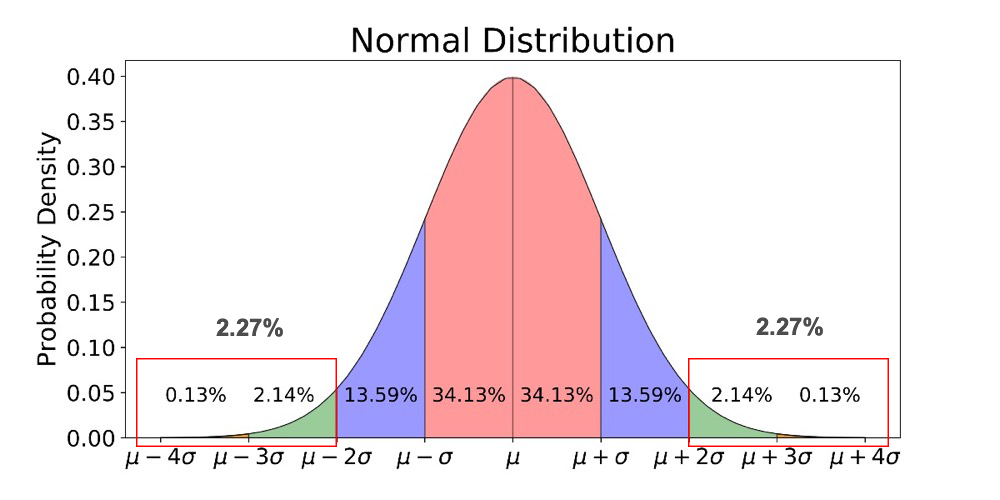

## For Example: If the standard deviation of the close price is larger than +2 , then you should Sell your stock and if the standard deviation of the close price is less than -2 , then you should Buy more.

# 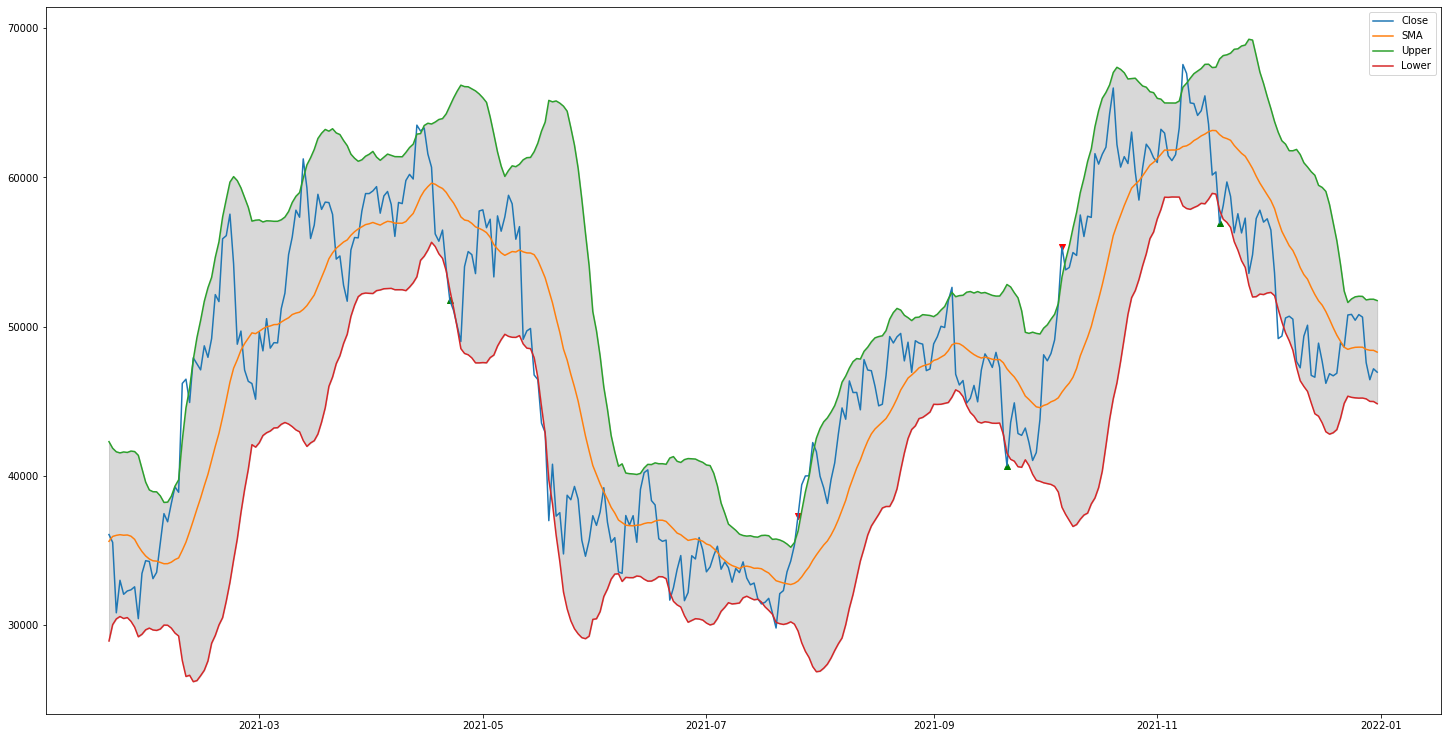

# -------------------------------------------------------------------------

# Bitcoin Price
## Get Bitcoin Data from yfinance (every day for 1 year)

In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

data = yf.download(tickers = ('AMD'), 
                   period = '1y', 
                   interval = '1d',
                   auto_adjust = True)
df = pd.DataFrame(data)
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2022-05-16,93.860001,98.169998,93.080002,94.239998,131065700
2022-05-17,97.879997,103.199997,97.540001,102.470001,164227200
2022-05-18,100.000000,104.220001,95.709999,96.279999,142603200
2022-05-19,96.690002,100.690002,95.089996,96.669998,141506200
2022-05-20,98.389999,98.639999,88.260002,93.500000,164126800
...,...,...,...,...,...
2023-05-10,96.419998,99.940002,96.120003,97.019997,95619500
2023-05-11,98.160004,99.190002,96.139999,97.099998,57061000
2023-05-12,96.830002,97.449997,93.680000,95.260002,53790400


In [2]:
## Simple Moving Average (SMA) for 20 days
df['SMA'] = df.Close.rolling(window=25).mean()

## standard deviations for 20 days
df['stddev'] = df.Close.rolling(window=25).std()

## Upper is 2 standard deviations above SMA and Lower is 2 standard deviations below SMA
df['Upper'] = df.SMA + 5 * df.stddev
df['Lower'] = df.SMA - 5 * df.stddev

## Generate the Buy_signal and Sell_signal based on the strategy
df['Buy_signal'] = np.where(df.Close < df.Lower, True, False)
df['Sell_signal'] = np.where(df.Close > df.Upper, True, False)

## Remove nan value
df = df.dropna()
df

,Open,High,Low,Close,Volume,SMA,stddev,Upper,Lower,Buy_signal,Sell_signal
Date,,,,,,,,,,,
2022-06-21,84.169998,85.809998,82.599998,83.790001,87780600,95.926400,7.752673,134.689766,57.163035,False,False
2022-06-22,84.400002,86.379997,83.300003,83.750000,86634700,95.506801,8.122791,136.120757,54.892844,False,False
2022-06-23,84.320000,84.410004,80.230003,82.430000,100614600,94.705201,8.391380,136.662100,52.748301,False,False
2022-06-24,83.559998,87.529999,83.080002,87.080002,88553900,94.337201,8.520183,136.938113,51.736288,False,False
2022-06-27,87.360001,88.220001,85.250000,86.160004,74663500,93.916801,8.658451,137.209055,50.624547,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-10,96.419998,99.940002,96.120003,97.019997,95619500,90.310001,3.661963,108.619817,72.000184,False,False
2023-05-11,98.160004,99.190002,96.139999,97.099998,57061000,90.491601,3.884030,109.911751,71.071451,False,False
2023-05-12,96.830002,97.449997,93.680000,95.260002,53790400,90.603201,3.982089,110.513645,70.692756,False,False


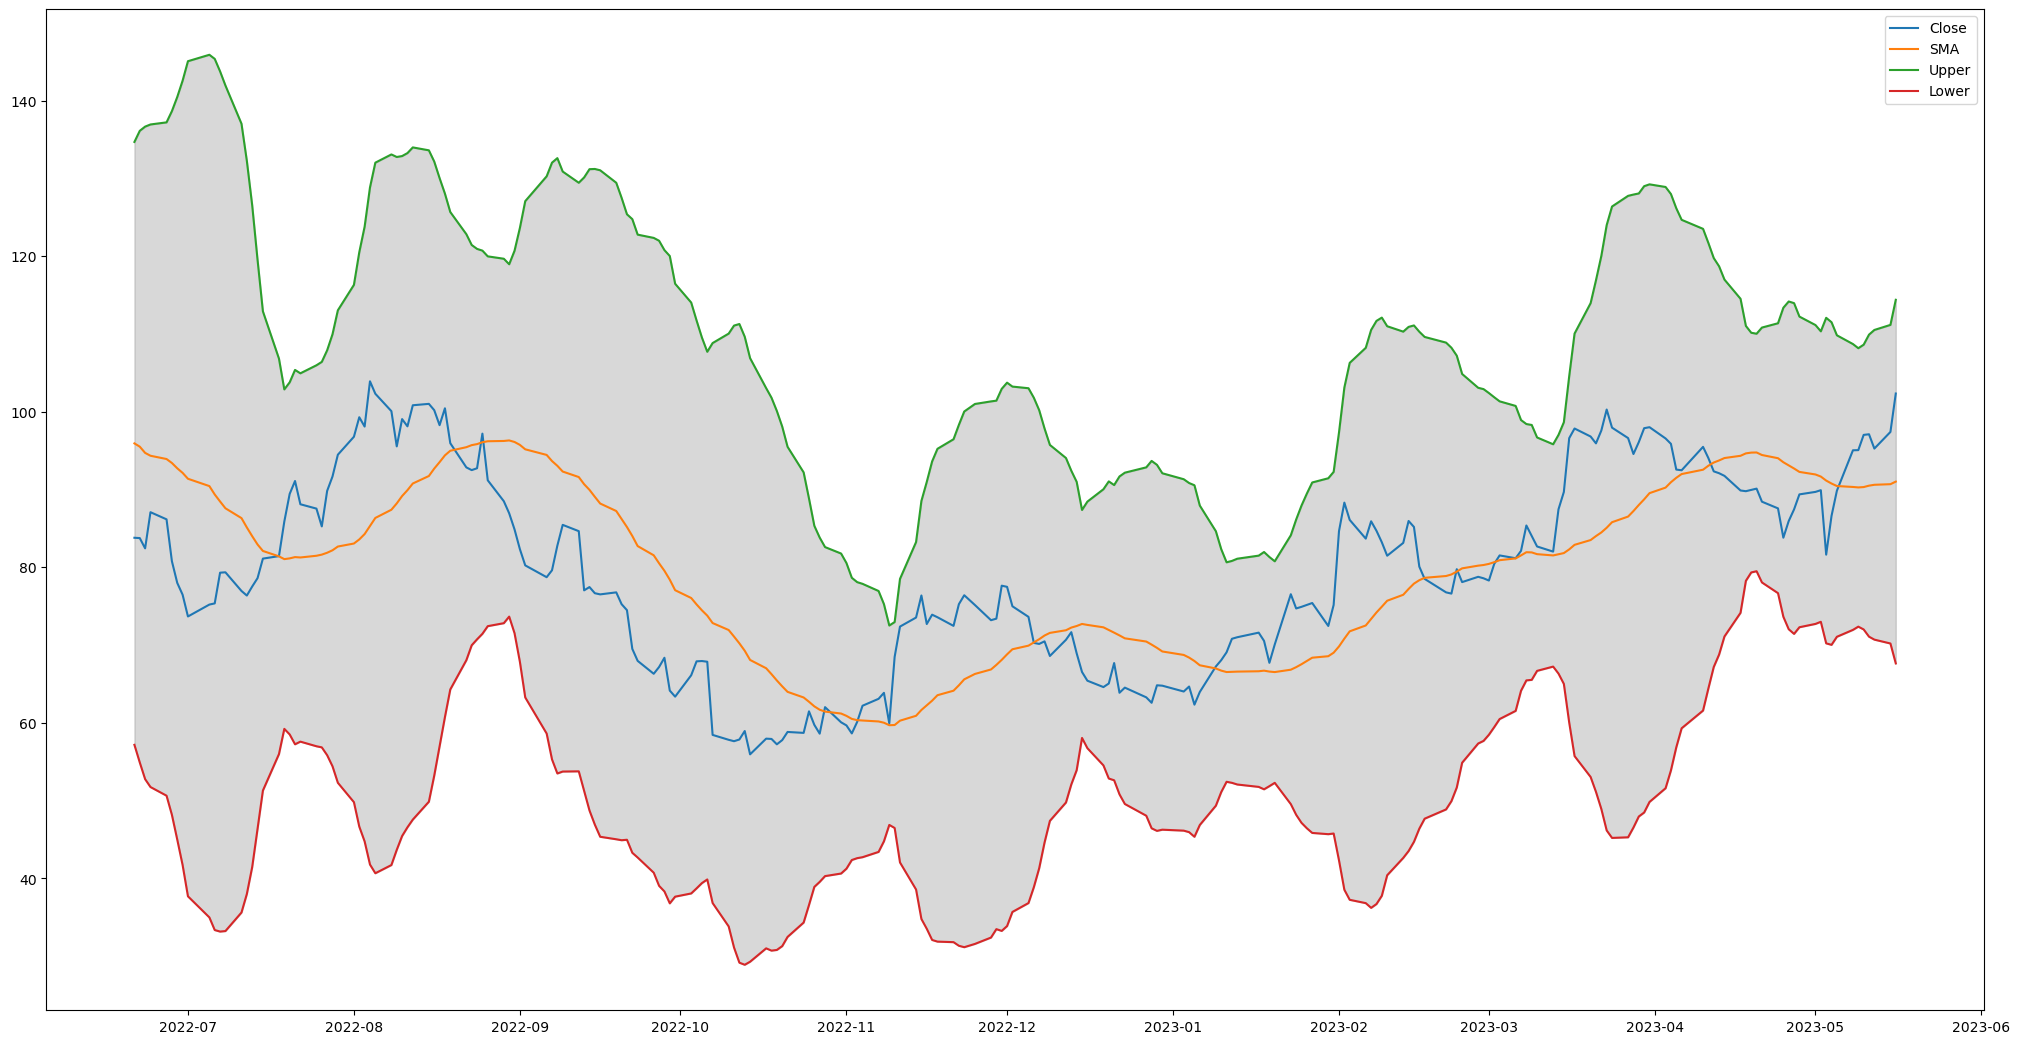

In [3]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.index[df.Buy_signal], df[df.Buy_signal].Close, marker='^', color = 'g')
plt.scatter(df.index[df.Sell_signal], df[df.Sell_signal].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

# Improve our buy and sell signal (Buy 1 Sell 1)

In [4]:
## Define new lists and stock_on_hand

buy = []
sell = []
stock_on_hand = False

## change multiple buy and sell to only 1 buy and 1 sell

for i in range(len(df)):
    if df.Close[i] < df.Lower[i]:
        if stock_on_hand == False:
            buy.append(i)
            stock_on_hand = True
    elif df.Close[i] > df.Upper[i]:
        if stock_on_hand == True:
            sell.append(i)
            stock_on_hand = False

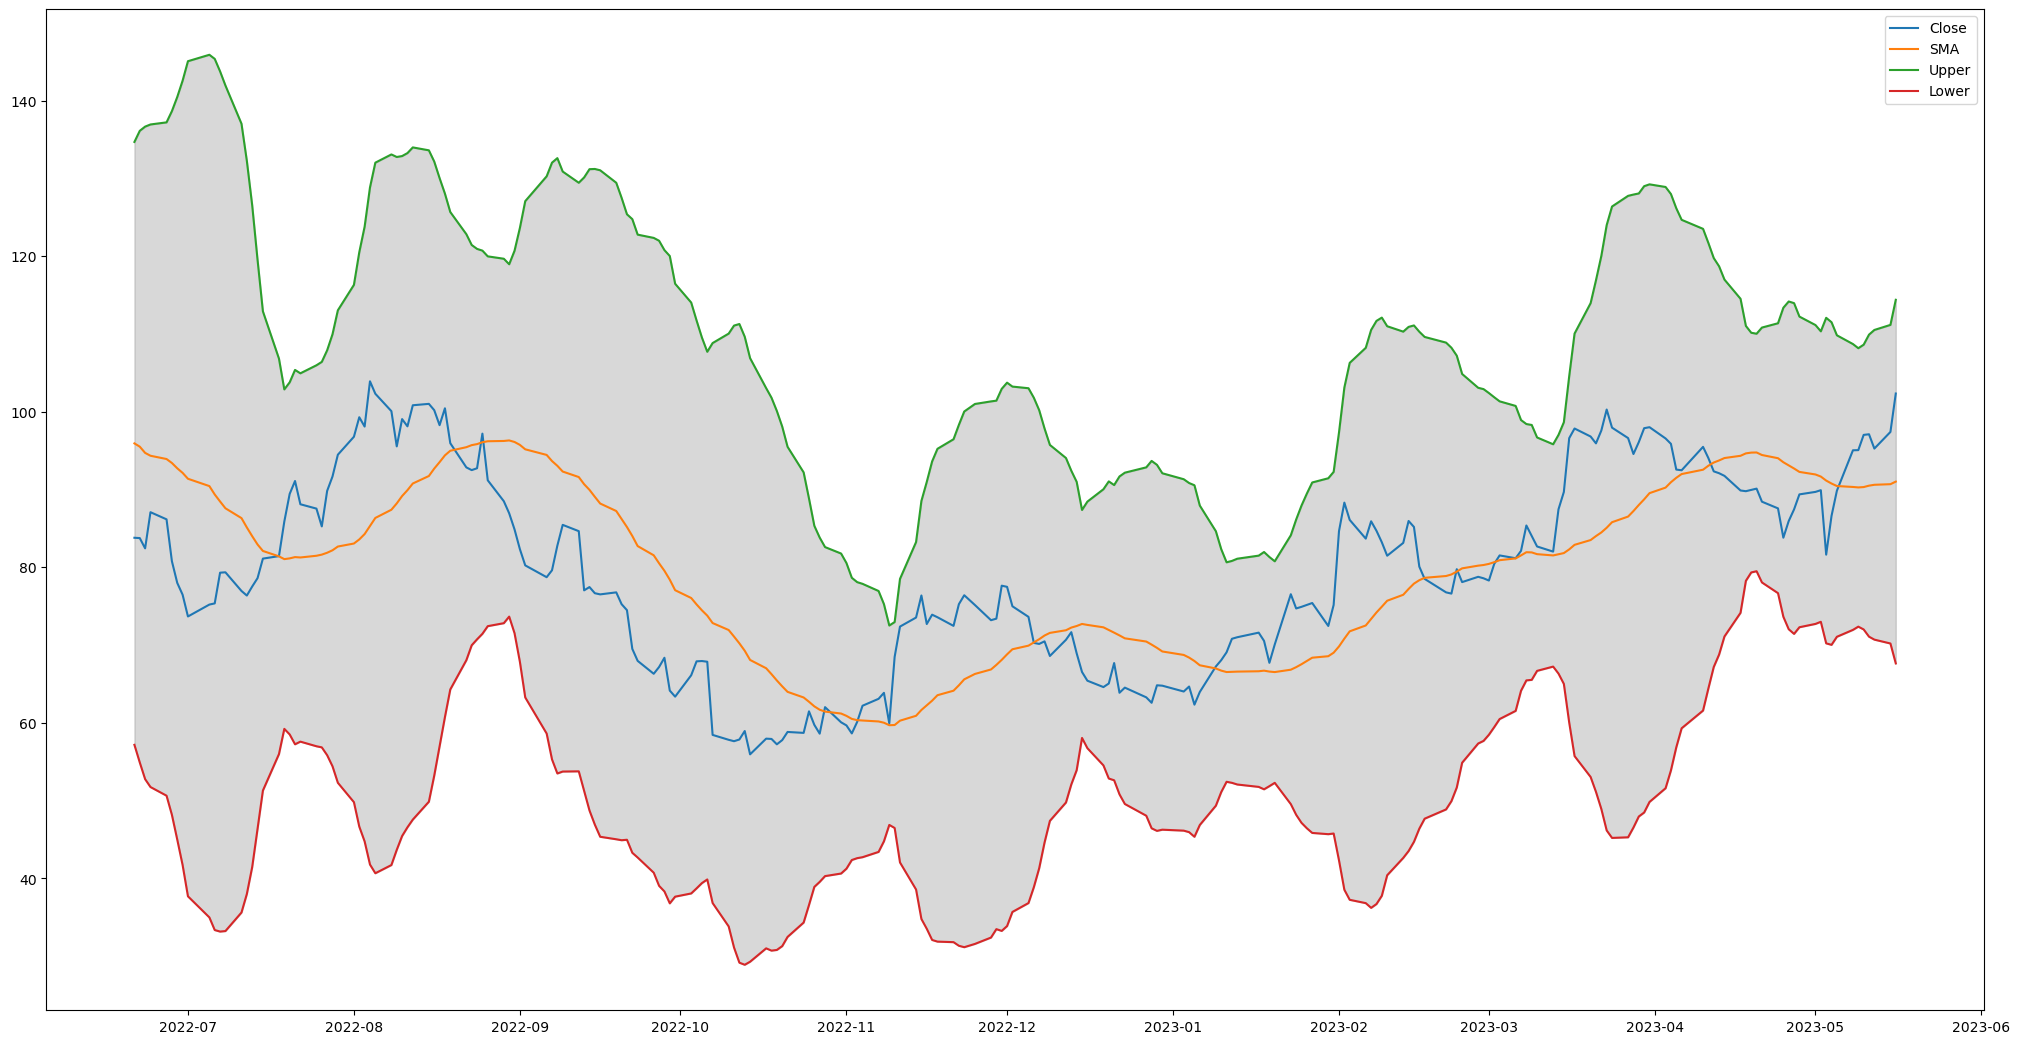

In [5]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.iloc[buy].index, df.iloc[buy].Close, marker='^', color = 'g')
plt.scatter(df.iloc[sell].index, df.iloc[sell].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

# Check if you can make profit based on this strategy

In [6]:
share = 1000
profit = 0

for i in range(len(sell)):
    
    profit = profit - (df.iloc[buy[i]].Close * share)
    profit = profit + (df.iloc[sell[i]].Close * share)
    
profit

0